# Table of Contents

- [Libraries](#Libraries)
- [Data](#Data)
- [Modeling](#Modeling)
    - [K-Means](#K-Means)

# Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans, k_means
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn import metrics
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

# Data

In [2]:
pitch_data = pd.read_csv('../datasets/mlb_pitch_stats_19_20_21.csv')
pitch_data.drop(columns = ['Unnamed: 0',' first_name', 'last_name'], axis = 1, inplace = True)
print(pitch_data.shape)
pitch_data.head()

(1072, 87)


,player_id,year,age,ip,bf,ab,h,k%,bb%,ba,...,cb_brk,cb_velo_range,cu%,cu_velo,cu_spinrate,cu_hb,cu_vb,cu_brk,cu_velo_range,xops
0,425794,2021,40,196.1,784,725,157,21.6,5.9,0.217,...,22.3,1.6,22.2,85.0,2408.0,6.3,-31.0,9.5,1.6,0.681
1,425844,2021,38,164.2,670,626,157,17.0,5.2,0.251,...,15.6,2.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.725
2,429722,2021,39,61.1,255,232,58,18.8,7.5,0.250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.851
3,433589,2021,37,72.1,290,273,63,12.4,4.1,0.231,...,10.7,1.8,23.3,84.5,2133.0,-1.1,-21.1,17.3,1.3,0.722
4,445276,2021,34,61.2,250,210,33,29.6,13.6,0.157,...,0.0,0.0,57.1,92.5,2689.0,7.3,-14.4,19.2,1.9,0.570


# Modeling

### Standardize Data

In [3]:
pitch_sc = StandardScaler().fit_transform(pitch_data)

### PCA

In [4]:
pca = PCA(n_components = None).fit(pitch_sc)

[1.72053862e-01 1.09503891e-01 8.82312951e-02 7.59529958e-02
 5.39966689e-02 5.04104305e-02 4.70574518e-02 4.11925643e-02
 3.72054215e-02 3.42388732e-02 2.79723019e-02 2.67603302e-02
 2.17861287e-02 1.90445399e-02 1.75579295e-02 1.61672782e-02
 1.18031360e-02 1.13010122e-02 1.07633275e-02 9.60085951e-03
 9.16944696e-03 8.14370751e-03 7.01696131e-03 6.72835133e-03
 6.41852949e-03 6.03405349e-03 5.59185458e-03 5.08088181e-03
 4.97514196e-03 4.71250292e-03 4.60597690e-03 3.85909734e-03
 3.55623466e-03 3.34579335e-03 3.21247909e-03 2.83743495e-03
 2.79192439e-03 2.56394697e-03 2.33076766e-03 2.10733714e-03
 2.02422579e-03 1.91560974e-03 1.70238220e-03 1.57263561e-03
 1.52932695e-03 1.39238648e-03 1.26154934e-03 1.21036921e-03
 1.18520649e-03 1.09723751e-03 1.02323824e-03 8.38225020e-04
 7.76490083e-04 4.91057767e-04 4.78980298e-04 4.65245575e-04
 4.31363983e-04 3.94827017e-04 3.87170838e-04 3.53453505e-04
 3.18948703e-04 2.74757485e-04 2.25678356e-04 1.45489763e-04
 1.15635334e-04 1.072121

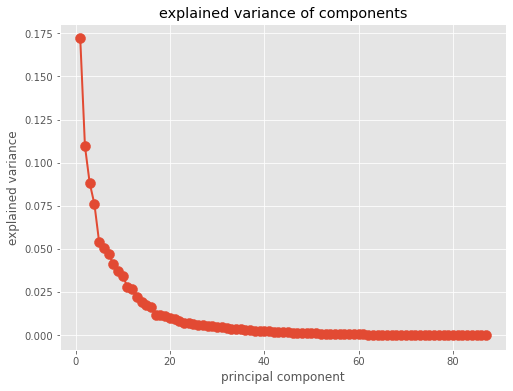

In [5]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,88), pca.explained_variance_ratio_, lw = 2)
ax.scatter(range(1, 88), pca.explained_variance_ratio_, s = 100)
ax.set_title('explained variance of components')
ax.set_xlabel('principal component')
ax.set_ylabel('explained variance');
print(pca.explained_variance_ratio_)

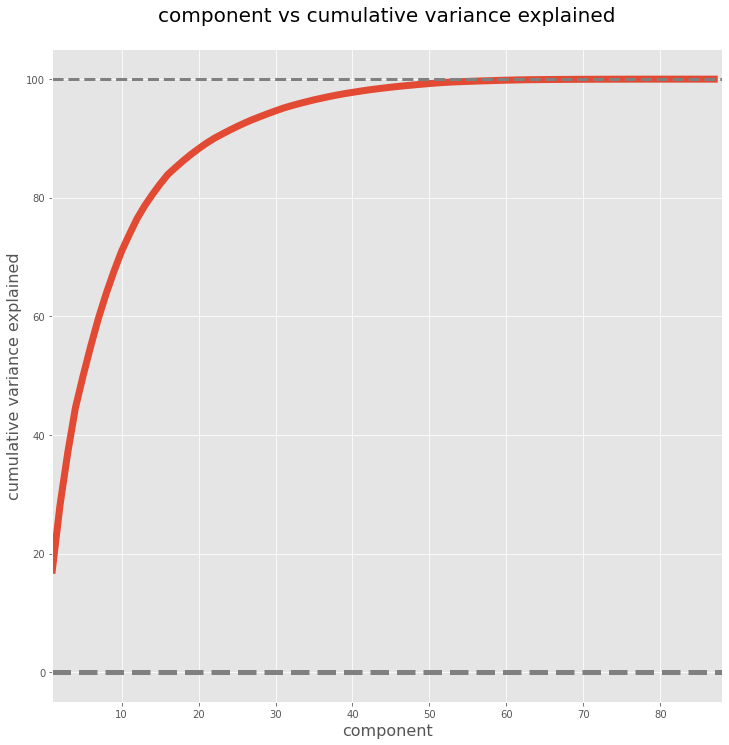

In [6]:
cum_var_exp = np.cumsum(pca.explained_variance_ratio_) * 100
plt.figure(figsize=(12,12))
component_number = range(1, 88)
plt.plot(component_number, cum_var_exp, lw=7)
plt.axhline(y=0, linewidth=5, color='grey', ls='dashed')
plt.axhline(y=100, linewidth=3, color='grey', ls='dashed')
ax = plt.gca()
ax.set_xlim([1,88])
ax.set_ylim([-5,105])
ax.set_ylabel('cumulative variance explained', fontsize=16)
ax.set_xlabel('component', fontsize=16)  
ax.set_title('component vs cumulative variance explained\n', fontsize=20);

In [7]:
#reduced_data = PCA(n_components=pca_num_components).fit_transform(X_scaled)
#results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

### K-Means

In [8]:
ss = StandardScaler()
X_scaled = ss.fit_transform(pitch_data)

In [9]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)
 
for k in K:
    km = KMeans(n_clusters=k).fit(X_scaled)
    km.fit(X_scaled)
 
    distortions.append(sum(np.min(cdist(X_scaled, km.cluster_centers_,
                                        'euclidean'), axis=1)) / X_scaled.shape[0])
    inertias.append(km.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X_scaled, km.cluster_centers_,
                                   'euclidean'), axis=1)) / X_scaled.shape[0]
    mapping2[k] = km.inertia_

In [10]:
# distortion
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 9.10899651819255
2 : 8.571710616732679
3 : 8.271519074207383
4 : 8.033136538054986
5 : 7.893460206250808
6 : 7.739209653968109
7 : 7.60802148242655
8 : 7.52340594489794
9 : 7.442998102226113
10 : 7.3896933761435095
11 : 7.330261432394489
12 : 7.251822391755998
13 : 7.190851194311798
14 : 7.139648036748222
15 : 7.0879284710995085
16 : 7.034318920874664
17 : 7.004471762083313
18 : 6.94884061279799
19 : 6.907177368011013


In [11]:
# inertia
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 93264.00000000015
2 : 82556.10039251854
3 : 76868.56259522785
4 : 72816.82434908369
5 : 69738.67613158569
6 : 67051.38365570224
7 : 64958.95516473505
8 : 63717.52006707233
9 : 62291.108085999025
10 : 61322.2482558805
11 : 60327.47123610269
12 : 59112.12958404597
13 : 58200.2319844702
14 : 57401.379435904295
15 : 56603.65452100829
16 : 55882.93345071311
17 : 55351.34614486964
18 : 54430.38673653642
19 : 53850.78813087452


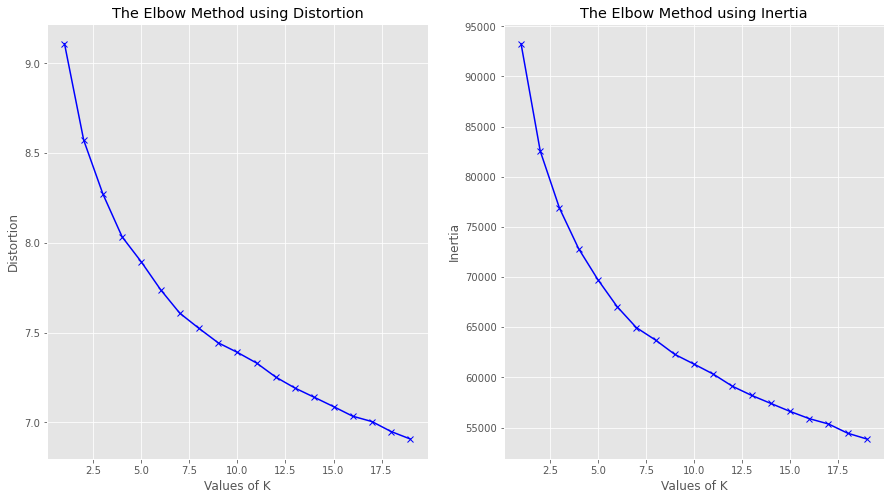

In [12]:
#https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

fig, ax = plt.subplots(1, 2, figsize = (15,8))
ax[0].plot(K, distortions, 'bx-')
ax[0].set_xlabel('Values of K')
ax[0].set_ylabel('Distortion')
ax[0].set_title('The Elbow Method using Distortion')

ax[1].plot(K, inertias, 'bx-')
ax[1].set_xlabel('Values of K')
ax[1].set_ylabel('Inertia')
ax[1].set_title('The Elbow Method using Inertia');

In [13]:
km = KMeans(n_clusters = 10,
            random_state = 0)

km.fit(pitch_data)
label = km.fit_predict(pitch_data)

print(label)

[2 2 2 ... 3 3 3]


In [14]:
pitch_data['label'] = label
pitch_data.head()

,player_id,year,age,ip,bf,ab,h,k%,bb%,ba,...,cb_velo_range,cu%,cu_velo,cu_spinrate,cu_hb,cu_vb,cu_brk,cu_velo_range,xops,label
0,425794,2021,40,196.1,784,725,157,21.6,5.9,0.217,...,1.6,22.2,85.0,2408.0,6.3,-31.0,9.5,1.6,0.681,2
1,425844,2021,38,164.2,670,626,157,17.0,5.2,0.251,...,2.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.725,2
2,429722,2021,39,61.1,255,232,58,18.8,7.5,0.250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.851,2
3,433589,2021,37,72.1,290,273,63,12.4,4.1,0.231,...,1.8,23.3,84.5,2133.0,-1.1,-21.1,17.3,1.3,0.722,2
4,445276,2021,34,61.2,250,210,33,29.6,13.6,0.157,...,0.0,57.1,92.5,2689.0,7.3,-14.4,19.2,1.9,0.570,2


In [15]:
centroids = km.cluster_centers_

print('Number of Centroids:', len(centroids))
print("Predicted clusters to points: ", label[:10], '\n')
print('shape of labels:', len(km.labels_))
print('labels:', km.labels_)
print('Number of iterations:', km.n_iter_)
print('Number of features:', km.n_features_in_)
print('Number of clusters:', km.n_clusters)
print('Inertia:', km.inertia_)
print('Silhouette Score:', silhouette_score(pitch_data, label))
print("Location of centroids: ")
print(centroids)

Number of Centroids: 10
Predicted clusters to points:  [2 2 2 2 2 2 2 2 2 2] 

shape of labels: 1072
labels: [2 2 2 ... 3 3 3]
Number of iterations: 10
Number of features: 87
Number of clusters: 10
Inertia: 50392742622.71049
Silhouette Score: 0.6478240656414348
Location of centroids: 
[[ 6.22049660e+05  2.02008000e+03  2.70300000e+01  7.14930000e+01
   3.01820000e+02  2.70270000e+02  6.38900000e+01  2.54500000e+01
   9.00200000e+00  2.32020000e-01  3.91220000e-01  3.10190000e-01
   7.01460000e-01  3.11200000e+01  3.91190000e+00  3.48000000e+00
   1.10000000e-01  2.29000000e-01  3.83240000e-01  3.03910000e-01
   3.04690000e-01  3.09990000e-01  3.63700000e-01  3.64280000e-01
   3.22630000e-01  3.20160000e-01  8.84600000e+01  1.29030000e+01
   3.31310000e+01  7.16300000e+00  5.86100000e+00  4.06500000e+00
   3.68620000e+01  6.71990000e+01  1.99110000e+01  2.83860000e+01
   4.53130000e+01  5.41540000e+01  5.15570000e+01  1.18041000e+03
   7.95630000e+01  4.84430000e+01  4.21290000e+01  2.7

In [16]:
pitch_data.groupby(by = 'label').mean().T

label,0,1,2,3,4,5,6,7,8,9
player_id,622049.66000,495891.101449,450355.726415,664196.487047,545079.958333,600548.019455,643162.059829,572372.944444,519958.688525,282332.000
year,2020.08000,2019.913043,2019.783019,2020.259067,2019.885417,2019.883268,2020.085470,2019.847222,2019.770492,2019.000
age,27.03000,33.202899,35.226415,25.150259,30.968750,28.392996,26.581197,30.277778,31.508197,39.000
ip,71.49300,81.828986,79.088679,62.670466,81.681250,76.278599,66.523077,73.290278,71.073770,107.100
bf,301.82000,345.246377,335.103774,268.321244,343.041667,324.661479,283.162393,313.513889,304.426230,468.000
...,...,...,...,...,...,...,...,...,...,...
cu_hb,0.30900,0.679710,0.793396,0.520725,0.566667,0.402335,0.018803,0.030556,0.236066,0.100
cu_vb,-5.20900,-12.866667,-13.725472,-7.067876,-11.032292,-8.678988,-7.937607,-7.394444,-8.683607,-23.800
cu_brk,1.79800,4.292754,5.297170,2.494819,3.577083,2.873541,2.377778,2.056944,3.509836,10.600
cu_velo_range,0.27700,0.750725,0.753774,0.406218,0.617708,0.471595,0.394017,0.327778,0.503279,1.500


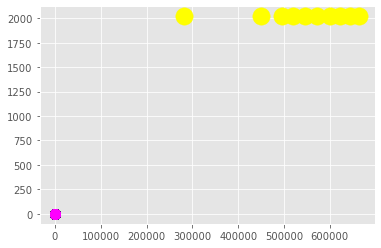

In [17]:
plt.scatter(X_scaled[label==0, 0], X_scaled[label==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X_scaled[label==1, 0], X_scaled[label==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X_scaled[label==2, 0], X_scaled[label==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X_scaled[label==3, 0], X_scaled[label==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X_scaled[label==4, 0], X_scaled[label==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', label = 'Centroids');